# Group Project
In this notebook, we utilize various machine learning algorithms to predict the price range (class) of a house. Additional information regarding the data can be found at this link: https://www.openml.org/searchtype=data&sort=runs&id=42165&status=active.<br>

To convert the problem into a classification task, the prices were transformed into classes, resulting in the following:following 5 classes: <br>
>0: Sale Price between \\$0 and \\$100,000 <br>
>1: Sale Price larger than \\$100,000 but smaller than or equal to \\$200,000<br>
>2: Sale Price larger than \\$200,000 but smaller than or equal to \\$300,000<br>
>3: Sale Price larger than \\$300,000 but smaller than or equal to \\$400,000<br>
>4: Sale Price larger than \\$400,000 <br> 

---
Structure of the Notebook:

1. Importing Packages and defining plot style
2. Data visualisation
3. Cleaning the Data
4. Function for testing different Algorithms
5. Applying different Algorithms

## Importing Packages and defining plot style
Packages that are being used and therefore need to be installed: pandas, numpy, matplotlib, seaborn, pywaffle, sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and viewing the data
Note: If this notebook is in the same folder as the DataSet, you can run it without changing anything. However if this is not the case you have to add the path to the 'GroupProjectDataSet.csv'.

In [2]:
df = pd.read_csv('GroupProjectDataSet.csv')

print('Shape of Original Data Set:', df.shape)

# We view the full data Set to get a quick overview of the charachteristics of the houses. 
pd.set_option('display.max_columns', None)
df.head()

Shape of Original Data Set: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Class
0,530.0,20.0,RL,NaN,32668.0,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6.0,3.0,1957.0,1975.0,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515.0,0.0,0.0,2515.0,1.0,0.0,3.0,0.0,4.0,2.0,TA,9.0,Maj1,2.0,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0.0,0.0,200.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3.0,2007.0,WD,Alloca,2.0
1,492.0,50.0,RL,79.0,9490.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6.0,7.0,1941.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403.0,Rec,165.0,238.0,806.0,GasA,TA,Y,FuseA,958.0,620.0,0.0,1578.0,1.0,0.0,1.0,0.0,3.0,1.0,Fa,5.0,Typ,2.0,TA,Attchd,1941.0,Unf,1.0,240.0,TA,TA,Y,0.0,0.0,32.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,8.0,2006.0,WD,Normal,1.0
2,460.0,50.0,RL,NaN,7015.0,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5.0,4.0,1950.0,1950.0,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185.0,Unf,0.0,524.0,709.0,GasA,TA,Y,SBrkr,979.0,224.0,0.0,1203.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,5.0,Typ,1.0,TA,Detchd,1950.0,Unf,1.0,352.0,TA,TA,Y,0.0,0.0,248.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,7.0,2009.0,WD,Normal,1.0
3,280.0,60.0,RL,83.0,10005.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,2Story,7.0,5.0,1977.0,1977.0,Hip,CompShg,Plywood,Plywood,BrkFace,299.0,TA,TA,CBlock,Gd,TA,No,BLQ,392.0,Unf,0.0,768.0,1160.0,GasA,Ex,Y,SBrkr,1156.0,866.0,0.0,2022.0,0.0,0.0,2.0,1.0,4.0,1.0,TA,8.0,Typ,1.0,TA,Attchd,1977.0,Fin,2.0,505.0,TA,TA,Y,288.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3.0,2008.0,WD,Normal,1.0
4,656.0,160.0,RM,21.0,1680.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6.0,5.0,1971.0,1971.0,Gable,CompShg,HdBoard,ImStucc,BrkFace,381.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,525.0,525.0,GasA,TA,Y,SBrkr,525.0,567.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,TA,6.0,Typ,0.0,NaN,Detchd,1971.0,Unf,1.0,264.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,3.0,2010.0,WD,Family,0.0


There are a lot of factors in our data set which is why we do some data visualisation to get a better understanding of the data.

## Datavisualisation

### Histplots of numeric variables
First, let's examine the histograms of all the numerical values to observe how the values are distributed within each column/factor. As seen in the histograms, there are a variety of distributions across the different columns, which is a promising indication. This is because with more columns containing diverse information, the algorithms are more likely to perform better.

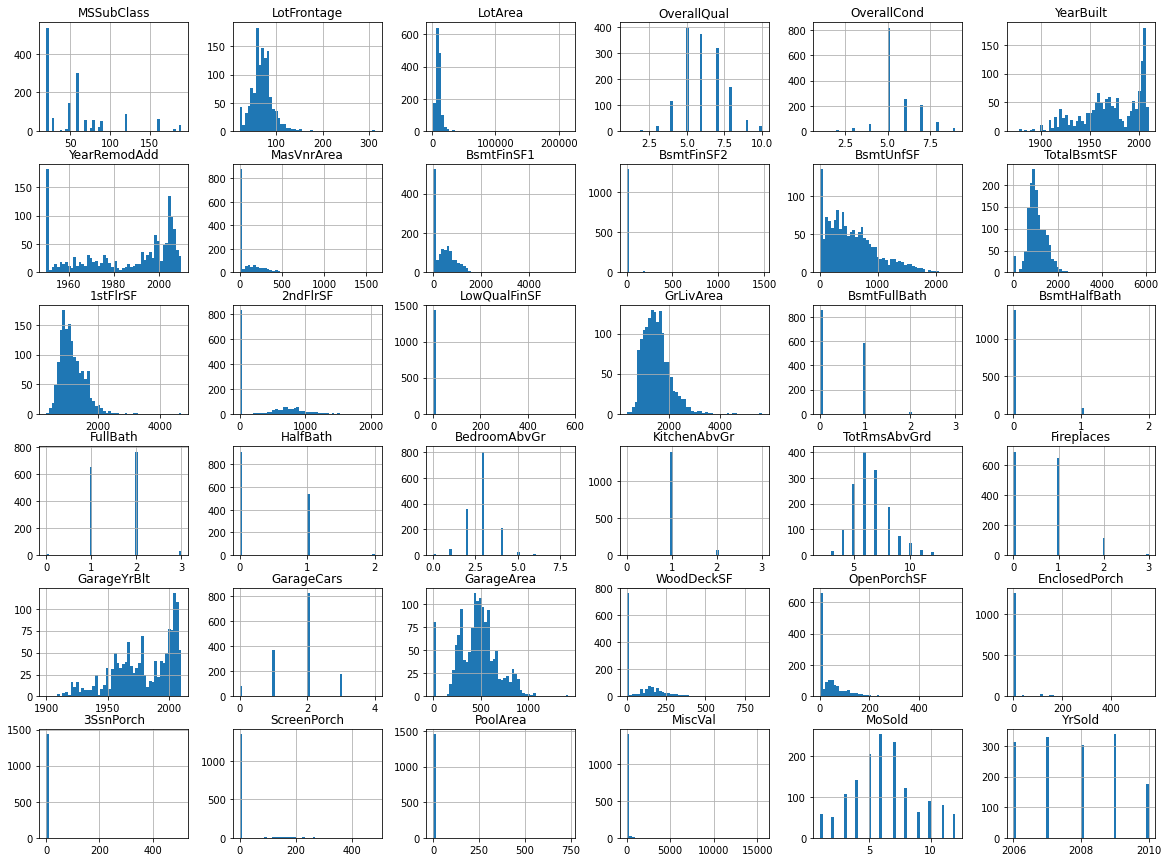

In [3]:
df_num = df.select_dtypes("float64")
df_num = df_num.drop(columns=["Id","Class"]) # We drop these since ID is only an Index and we will look at the Distribution of the Class later.
df_num.hist(figsize=(20,15), bins=50)
plt.show()

### Correlation matrix
Additionally, we present the correlation matrix, which we use to determine whether there are many variables with high correlation. If that were the case, it might be appropriate to remove some variables since the additional information is limited. However, since this is not the case, we are retaining nearly all of the variables in the dataset for the time being. We only exclude GarageYrBlt and GarageCars due to their high correlation, but we will delve into that later.<br>

Note: we will perform more feature selection, but it will not be based on this correlation matrix.

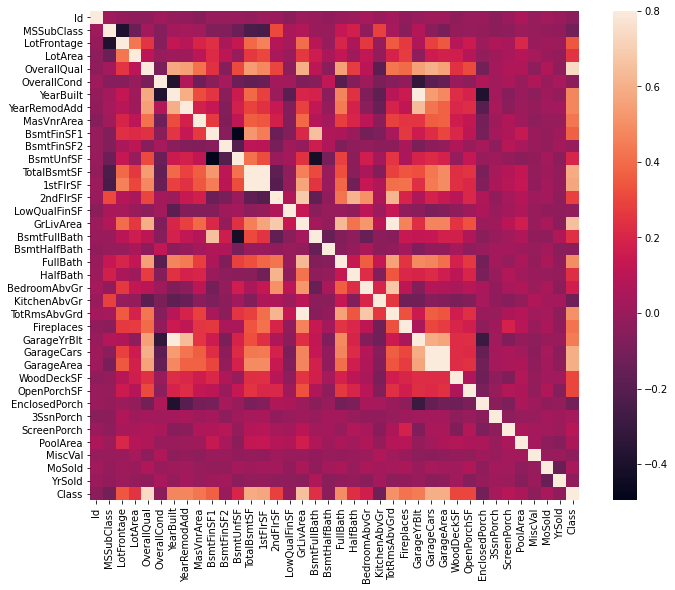

In [4]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Waffle Chart of Class
Lastly, we examine the class distribution, which reveals a significant class imbalance. Classes 1 and 2 are considerably more common than the others. This implies that we may need to upsample our data to balance the class sizes and prevent poor performance on the underrepresented classes.<br>

Furthermore, we should regulate our split to prevent having a minimal number of data points from class 4 in either our training or test sets.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

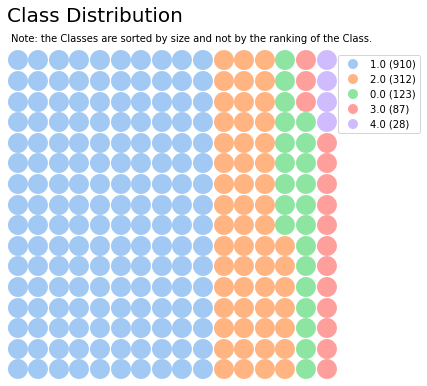

In [6]:
# To plot the waffle Chart
counts = df['Class'].value_counts() 

colors = sns.color_palette('pastel', n_colors=5)

fig = plt.figure(
    FigureClass=Waffle,
    rows=16,
    columns=16,
    values=counts,
    icon_size=20,
    icon_legend=True,
    figsize=(10, 6),
    block_aspect_ratio=1,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='circle',
    colors=colors,
    icon_style='solid',
    title={'label': 'Class Distribution\n', 'loc': 'left', 'fontdict': {'fontsize': 20}},
    labels=[f'{k} ({v})' for k, v in counts.items()],
    font_size=12,
)

fig.set_tight_layout(False)
fig.set_facecolor('white')
fig.patch.set_alpha(0.0)
fig.text(x=0.13, y=0.9, s='Note: the Classes are sorted by size and not by the ranking of the Class.', fontsize=10, fontweight='medium')
plt.show()

## Cleaning the data
### Factorizing and dealing with NaN's
To Clean our data, we are looking into the NaN’s. The initial step is to check whether there are any NaN values, and if so, in which columns they are located.

In [7]:
#looking for NaN's
print('All Classes with NANs ranked by the number of NANs in them.')

#Get the total number of NaN's
total = df.isnull().sum().sort_values(ascending=False)

#Get the percentage of NaN's in each column
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

#Create a DataFrame with the total number of NaN's and the percentage
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#Only include the columns containing NaN's
missing_data = missing_data.loc[missing_data['Percent'] > 0]
missing_data.head(len(missing_data))

All Classes with NANs ranked by the number of NANs in them.


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


__NaN's__  
There are actually a considerable number of NaN values, as shown. Some of the NaN values are regarded as a separate class rather than an "actual" NaN. These should be converted into classes. However, before addressing that, we will clean the dataset of actual missing data NaNs.<br>

We are modifying other columns as well, as seen in the code. Typically, we aim to prepare our dataset so that we can use OneHotEncoder to convert all string variables to dummies. Therefore, we require a dataset with no NaN values.

__GarageYrBlt__  
The column "GarageYearBlt" presents a problem since some homes have no garage at all, resulting in NaN values. We cannot delete all rows with NaN values since there are too many (81), and we do not want to lose 5.5% of our data. How can we solve this issue?

- Numerical value: We cannot substitute NaN values with 0 since this would imply that the garage was built in year 0, which is nonsensical. Therefore, a numerical value is not an option.

- Dummy variables: We could accomplish this, but it would result in 98 columns (see below) solely to indicate the year the garage was built. Thus, we may avoid this solution as well.

__Solution__: Since GarageYrBlt is highly correlated with YearBlt, and the additional information from GarageYrBlt is therefore limited, we decided to eliminate this column. <br>

__GarageCars__:
We are also eliminating the GarageCars column since it is strongly correlated with GarageArea, as they contain nearly the same information.

- GarageCars: indicates how many cars can fit in the garage
- GarageArea: indicates the garage's size

In [8]:
# GarageYrBlt is a factor which states the year the garage was built. We convert it to a string to get all values (including NaN's) when using nunique()
df[["GarageYrBlt"]] = df[["GarageYrBlt"]].astype(str)
num_unique = df['GarageYrBlt'].nunique()
print(num_unique)

98


In [9]:
#factorize "CentralAir" since it is a binary variable
df['CentralAir'] = np.where(df['CentralAir'] == 'N', 0, 1)

#Drop the NaN of MasVnrType and Electrical because there are only 9 rows with NaN's in either of the columns and we cannot assume the NaNs to be None. 
df = df.dropna(subset=['MasVnrType','Electrical'])

#Replace all LotFrontage NaN's with 0 because if there is no connection to the road the linear feet of street connected to property is 0.
df[["LotFrontage"]] = df[["LotFrontage"]].fillna(0)

#Convert the numerical categorical data into strings. For further information see below. 
df[["MSSubClass"]] = df[["MSSubClass"]].astype(str)

# Drop the column "ID" since we don't need it. 
df = df.drop(['Id','GarageYrBlt', 'GarageCars'] , axis=1)

We are converting the column __MSSubClass__ to strings to subsequently transform it into dummy variables since it is a categorical value. It identifies the type of dwelling involved in the sale, which is a categorical value that must be transformed into a dummy.

## Data Sets
We have decided to use two different datasets. The first is a smaller set where we aim to extract as much information as possible using as little data as possible. We will also perform feature selection on this dataset.<br>

The reason for this is that we expect it to be faster (although we realized later that this is not always the case). In the small dataset, we will factorize all variables that have a clear ranking instead of creating a dummy variable for each quality level. By doing this, we are assuming linearity across different quality measures. More on this topic can be found in the summary.<br>

To complement the small dataset, we will also use a larger dataset where we convert all quality measures into dummy variables instead of factorizing them, avoiding assumptions about linearity.

## Small Data Set 
Initially, we transform the string-type columns into numerical-type columns by applying a mapping function. To achieve this, we establish a dictionary containing the string values and their corresponding numerical values. Using a for-loop, we can utilize this dictionary to convert all the columns having string values listed in the dictionary. This approach facilitates changing the numerical values associated with specific string values by simply modifying the dictionary.<br>

However, certain columns contain distinct string values, making it impossible to apply the transformation using the existing mapping library. In such cases, we generate additional mapping libraries.

In [10]:
#Creating new small Data Set
dfS = df.copy()

#Map the string Quality measures to a numerical quality measure, which we can do because the Ranking is clear.
mapping = {np.nan: 0,'Po': 1., 'Fa': 2., 'TA': 3., 'Gd': 4., 'Ex': 5} # This is the library we want to map our Variables with since they all have the same values in them.
cols_to_map = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 'KitchenQual','FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC' ]
for col in cols_to_map:
    dfS[col] = dfS[col].map(mapping)
    

# map the rest of string Qualtiy measures, which have different values in them and can therefore not be converted by the first mapping. 
bsmtFinType_map = {'GLQ': 6., 'ALQ': 5., 'BLQ': 4., 'Rec': 3., 'LwQ': 2., 'Unf': 1., np.nan: 0.} #Note that we assume that No garage is worse than an unfinished one
dfS['BsmtFinType2'] = dfS['BsmtFinType2'].replace(bsmtFinType_map)
dfS['BsmtFinType1'] = dfS['BsmtFinType1'].replace(bsmtFinType_map)

GarageFinish_map = {'Fin': 3., 'Rfn': 2., 'Unf': 1., np.nan: 0.}
dfS['GarageFinish'] = dfS['GarageFinish'].replace(GarageFinish_map)

    
#---------------------------------------------------------------------------------------------------------
# Here we show the same table as before but after converting the values and dropping some NaN's
# With that we can then see if we have any NaN's left, that are not part of a class.
print('\nShape of DataFrame after factorizing and Dropping NaNs', df.shape)

total = dfS.isnull().sum().sort_values(ascending=False)
percent = (dfS.isnull().sum()/dfS.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.loc[missing_data['Percent'] > 0]
missing_data.head(len(missing_data))


Shape of DataFrame after factorizing and Dropping NaNs (1451, 78)


,Total,Percent
MiscFeature,1397,0.962784
Alley,1361,0.937974
Fence,1170,0.806340
GarageType,81,0.055824
BsmtExposure,38,0.026189


As you can see we only have NaN's left in columns, where NaN stands for a class and not a missing value. We thus can continue with converting the string-columns to dummy variables with OneHotEncoder. 

## Dealing with categorical Values
As mentioned, we convert all the string variables (objects) to dummy variables. For this we use OneHotEncoder.

In [11]:
#Check what types of values are left and how many columns will be transformed.
df.dtypes.value_counts()

object     43
float64    34
int64       1
dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(df):
    # Select only columns with categorical data
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Create an instance of OneHotEncoder
    ohe = OneHotEncoder(handle_unknown='ignore')
    
    # Fit and transform the categorical data
    encoded_data = ohe.fit_transform(df[categorical_columns].astype(str).fillna('NaN')).toarray()
      
    # Create a new dataframe with the encoded data and new column names
    encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_columns))
    
    # Drop the original categorical columns from the copied dataframe
    df.drop(categorical_columns, axis=1, inplace=True)
    
    # Concatenate the copied dataframe with the encoded dataframe
    result_df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    
    # Drop columns that are the same
    result_df = result_df.loc[:, ~result_df.T.duplicated(keep='first')]
    
    return result_df


dfS = one_hot_encode(dfS)
print('Shape of data after OneHotEncoder: ',dfS.shape)
print("Amount of NaNs after Cleaning the data:", dfS.isna().sum().sum())


Shape of data after OneHotEncoder:  (1451, 259)
Amount of NaNs after Cleaning the data: 0


### Assign data and split into train and test sets
We have divided our dataset into training and testing subsets, and we have completed cleaning the small dataset. However, we would like to explain the intuition behind feature selection.<br>

To ensure that the distribution of classes is balanced, we have used stratify=yS during the train-test split. This was important because there is a limited amount of data from the fourth class, and we wanted to avoid either having none or all of the fourth class data in the test subset. If we had done so, it would have caused data leakage since the distribution of classes would have been the same in both the test and training sets. To prevent this, we have used SMOTE to upsample the data. As a result, the class distribution in the training sets during cross-validation may differ from the class distribution in the test sets. We will discuss this again when explaining how the algorithms function.

In [13]:
# Assign columns to feature matrix X and response vector y
XS = dfS.loc[:, dfS.columns != "Class"]
yS = dfS.loc[:, "Class"]

from sklearn.model_selection import train_test_split
# split the data into training and test sets
XS_train , XS_test , yS_train , yS_test = train_test_split(XS, yS, test_size=0.2, random_state=0, stratify=yS)

### Feature Selection: Identifying the most important features
We will implement feature selection within the pipeline. We cannot perform feature selection at the start because it may depend on the specific training set we use. When using cross-validation, the training set will be split again, and it will differ from the original training set. Therefore, we must perform feature selection for each fold of the cross-validation.<br>

The main problem with this approach is the time required since running a decision tree every time is time-consuming. This is the reason why some of our algorithms take longer for the small dataset than for the large dataset. However, since time is not a central part of our task, we have decided to do it correctly, even though one could argue that it might be a good idea to perform feature selection only once (more on this argument below).<br>

Nonetheless, we still want to determine the most important features. Below, we will conduct feature selection on our training set, similar to what we will do for each fold later in the pipeline. We will not use this for any specific purpose, but rather to provide a brief overview of which features are the most significant and how many features will be selected.

#### Feature Selection: Importance of Random Forest Classifier
We use the Random Forest classifier, as we will later in the pipeline, to determine the importance of features.


 The 30 attributes account for 58.14% of the outcome.


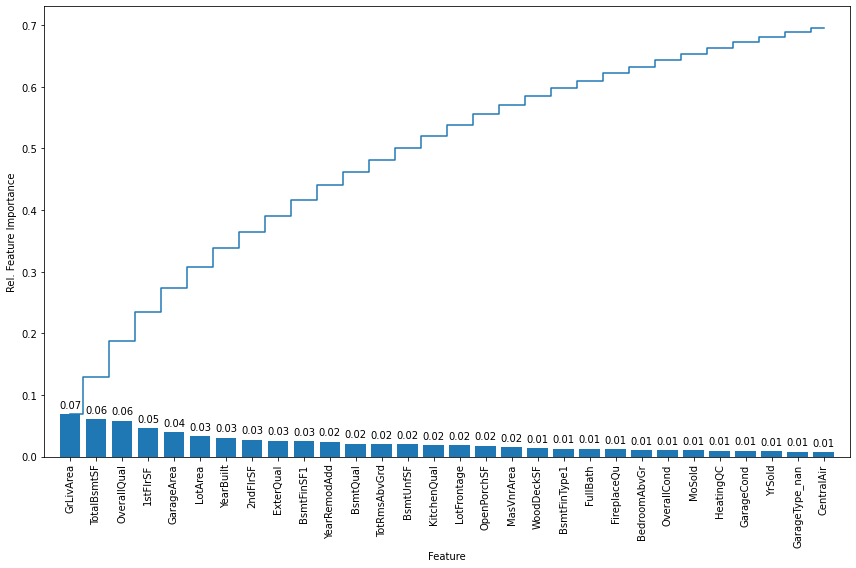

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Extract feature labels
feat_labels = dfS.columns[:-1]

# Create Random Forest object, fit data and extract feature importance attributes
forest = RandomForestClassifier(random_state=1)
forest.fit(XS_train, yS_train)
importances = forest.feature_importances_

# Here we look at the 30 most important features. 
# Notice that we only get the most important features with ONE draw of the train set and one random_state. 
# For the sustainability of the most important features accross different folds see chapter "Feature Selection with Cross Validation"

# Number of most important features
n = 30

# Sort the features along their importance
feat_imp = np.sort(importances)[::-1]

# calculate the cumsum of the features
sum_feat_imp = np.cumsum(feat_imp)[:n]

# Get an index with the indices of the features
indices = np.argsort(importances)[::-1]

import matplotlib
%matplotlib inline

# Plot feature importance (both cumul., individual)
plt.figure(figsize=(12, 8))
plt.bar(range(n), importances[indices[:n]], align='center')
for i in range(n):
    plt.text(i, importances[indices[i]] + 0.01, round(importances[indices[i]], 2), ha='center')
plt.xticks(range(n), feat_labels[indices[:n]], rotation=90)
plt.xlim([-1, n])
plt.xlabel('Feature')
plt.ylabel('Rel. Feature Importance')
plt.step(range(n), sum_feat_imp, where='mid', 
         label='Cumulative importance')
plt.tight_layout()

print('\n', f'The 30 attributes account for {round(sum(importances[0:30])*100, 2)}% of the outcome.')

In [15]:
for i in range(n):
    print('{0:2d}) {1:7s} {2:6.4f}'.format(i + 1, 
                                           feat_labels[indices[i]],
                                           importances[indices[i]]))
print('\n')

 1) GrLivArea 0.0690
 2) TotalBsmtSF 0.0608
 3) OverallQual 0.0582
 4) 1stFlrSF 0.0463
 5) GarageArea 0.0395
 6) LotArea 0.0336
 7) YearBuilt 0.0304
 8) 2ndFlrSF 0.0274
 9) ExterQual 0.0258
10) BsmtFinSF1 0.0252
11) YearRemodAdd 0.0243
12) BsmtQual 0.0211
13) TotRmsAbvGrd 0.0202
14) BsmtUnfSF 0.0197
15) KitchenQual 0.0185
16) LotFrontage 0.0183
17) OpenPorchSF 0.0174
18) MasVnrArea 0.0156
19) WoodDeckSF 0.0133
20) BsmtFinType1 0.0129
21) FullBath 0.0125
22) FireplaceQu 0.0118
23) BedroomAbvGr 0.0107
24) OverallCond 0.0106
25) MoSold  0.0098
26) HeatingQC 0.0097
27) GarageCond 0.0096
28) YrSold  0.0085
29) GarageType_nan 0.0078
30) CentralAir 0.0073




### Feature Selection with Cross Validation
As mentioned earlier, the above feature selection example is only valid for a single fold or no fold of the train set. Since we are performing cross-validation later, we are demonstrating here the most important features if we apply cross-validation across the feature selection process. The function "rfecv" helps us achieve this by providing the most robust of the best features based on test accuracy and variance of test accuracies across the folds. For a better understanding, please refer to the visualization below. <br>

One could argue that performing feature selection this way is good enough and may not require doing it within the pipeline. However, since it may result in data leakage and time is not a significant concern, we decided to include feature selection within the pipeline.

In [16]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Define your model --> use DecisionTreeClassifier since we then don't need to worry about scaling the data.
clf = RandomForestClassifier(random_state=4)
min_features_to_select = 20
# Define your feature selector using Recursive Feature Elimination with Cross Validation (RFECV)
# Set the number of folds to use for cross-validation and set the scoring metric
rfecv = RFECV(estimator=clf, 
              step=1, 
              cv=StratifiedKFold(n_splits=5), 
              scoring='accuracy',
              min_features_to_select= min_features_to_select, n_jobs=-1)

# Fit the feature selector to your data
rfecv.fit(XS_train, yS_train)


# Print the selected features
print(f"Optimal number of features: {rfecv.n_features_}", '\n')

Features = list(XS_train.columns[rfecv.support_])
print('Selected features: \n', *Features, sep = "\n")


Optimal number of features: 40 

Selected features: 

LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
ExterQual
BsmtQual
BsmtCond
BsmtFinType1
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
HeatingQC
CentralAir
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
FullBath
HalfBath
BedroomAbvGr
KitchenQual
TotRmsAbvGrd
Fireplaces
FireplaceQu
GarageArea
GarageQual
GarageCond
WoodDeckSF
OpenPorchSF
EnclosedPorch
MoSold
YrSold
MSSubClass_30.0
LotShape_Reg
HouseStyle_2Story
Foundation_PConc


As you can see the features selected are very similar as the features without cross validation. 

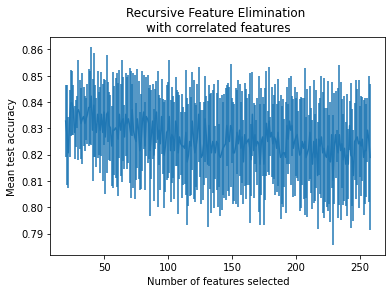

In [17]:
# plot the mean test accuracy and its variance on the number of features selected.
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"]
)


plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

## Large Data Set (dfL)
In this Dataset we try to keep all the information and make no assumption about the linearity
### Dealing with Categorical Features

In [18]:
#Creating new large data set
dfL = df.copy()

#Convert all numerical & categorical data into strings. We do this for the reasons explained above. (linearity assumption)
dfL[["OverallQual","OverallCond"]] = dfL[["OverallQual","OverallCond"]].astype(str)

# We can use our one-hot encoding function from above
dfL = one_hot_encode(dfL)

print('Shape of data frame:', dfL.shape)
print("Total amount of NaN's:", dfL.isna().sum().sum())

Shape of data frame: (1451, 324)
Total amount of NaN's: 0


### Assign data and split into train and test sets
We do the split just as we did with the small data set with stratify=yL

In [19]:
# Assign columns to feature matrix X and response vector y
XL = dfL.loc[:, dfL.columns != "Class"]
yL = dfL.loc[:, "Class"]

# split the data into training and test sets
XL_train , XL_test , yL_train , yL_test = train_test_split(XL, yL, test_size=0.2, random_state=0, stratify=yL)

## Data To work with:

Small Data Set: dfS <br>  
- Input Variables: XS 
- Output Variable: yS (Class of the house)
- Train Set: XS_train, yS_train  
- Test Set: XS_test, yS_test 

Large Data Set: dfL 
- Input Variables: XL 
- Output Variable: yL (Class of the house)
- Train Set: XL_train, yL_train 
- Test Set: XL_test, yL_test

# Algorithms
The preprocessing is now complete up to the point where we can use our pipeline for the remaining preprocessing steps (feature selection, standardization, and oversampling).<br>

Now, we will use various algorithms/classifiers to solve our classification problem. For this purpose, we will first create a function that will be used for each algorithm. When running the classifiers, this function will be applied, and only the different specifications/hyperparameters will need to be changed.<br>

To see how the function is used, take a look at the Logistic Regression section. Since it is always the same, we will not repeat the explanation of the code itself to avoid unnecessary repetition.<br>

The comparison of all the algorithms can be found at the end of our notebook.

### Note about the problem of overfitting: 
Despite our attempts to hyper-tune the algorithm, we were unable to prevent the algorithm from overfitting the data. However, we observed a slight difference in performance when we upsampled the data. Upsampling the data resulted in higher overfitting and worse scores for the basic algorithms such as Logistic Regression, Linear Discriminant Analysis, and SVM.

### Imports for the Algorithm function
Notice: we import all further functions at the place where they are used

In [22]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time

## Algortihm test function
We create a function which has the following input parameters:

- **Classifier:** The classifier is the algorithm you want to use to predict the class of a house.
- **params:** In params, you can define the parameters which should be tested in a Grid search. Notice that each parameter has to have the following name: 'classifier__X'and for X, you can insert the name of the parameter.
- **X_train, X_test, y_train, y_test:** You have to insert the data you want to run the algorithm on.
- **apply_feature_selection:** If true, then feature selection will be applied in the pre-processing step of each fold of a cross-validation.
- **apply_standardising:** If true, then standardisation will be applied in the pre-processing step of each fold of a cross-validation.
- **apply_sampling:** If true, then oversampling will be applied in the pre-processing step of each fold of a cross-validation.
- **cv:** in the XGBoost the cross validation is already included, which is why we don't need it there. This is why we includ this parameter to be able to turn of the cross validation.

In [23]:
def Algorithm(Classifier, params, X_train, X_test, y_train, y_test, apply_feature_selection=True, apply_standardising = True, apply_Sampling= True, cv=True):
    
    # First we define our folds: we do 5 folds because our data is not very big (especially class 4)
    # We use StratifiedKFold to make sure all the folds have at least some observations of the fourth class. 
    # This is important if we oversample our data. For example with only one observation of class 4 this observation would have a massive impact on the estimates of the algorithm.
    if cv:
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    else:
        kfold = None
    
    # For the feature selection we use RandomForestClassifier because it does not need to be scaled beforehand and can safe time because we only scale the selected features and not all if applied. 
    # We choose median as a threshold to make sure not too many features are picked and all algorithms have the same explanatoriy power in their train set.
    if apply_feature_selection:
        feature_selector = SelectFromModel(RandomForestClassifier(random_state=0), threshold='median')
    else:
        feature_selector = None
    
    # For standardising we use StandardScaler
    if apply_standardising: 
        Scaler = StandardScaler()
    else:
        Scaler = None 
        
    # For sampling we use SMOTE because it generates synthetic data and we can get some more variation in the underrepresented classes.
    # It is important that you scale if you use SMOTE because SMOTE uses KNN to generate its synthetic data points.
    if apply_Sampling: 
        Sampling = SMOTE(random_state=0)
    else:
        Sampling = None 
    
    # All preprocessing steps are included in this pipeline. If it is set to false, then they are not done.
    pipeline = ImbPipeline([('feature_selection', feature_selector),
                            ('scaler', Scaler),
                            ('oversampler', Sampling),
                            ('classifier', Classifier)])
  
    # We generate a GridSearchCV object with the pipeline, the parameters which have to be defined beforehand and specification of the cross validation (kfold). 
    F_grid = GridSearchCV(pipeline, params, cv=kfold, n_jobs=-1)
    
    # we then train our Algorithm 
    F_grid.fit(X_train, y_train)
    
    # get out the best estimators from our grid search and predict the test set with it.
    best_model = F_grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Print the best hyperparameters
    print("Best hyperparameters: ", F_grid.best_params_)
    
    # Print Training accuracy
    print('Best Training accuracy: {:.3f}'.format(F_grid.score(X_train, y_train)))
    
    # Classification report with Precision, recall, f1-score and support 
    target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4']
    print(classification_report(y_test, y_pred, target_names=target_names, zero_division=1))

    #return the F_grid for our overview at the end of the notebook.
    return F_grid


## Logistic Regression
We use **multi_class:** 'multinomial' as the logistic regression algorithm models the conditional probability of each class. The coefficients learned by the algorithm are used to predict the probability of each class, and the highest probability is chosen as the predicted one.

### Hyperparameters for LogReg
- **C:** This parameter in the grid defines the inverse strength of the regulator. Smaller C values lead to stronger regularization, which helps prevent overfitting the function. The regularization adds a penalty term to the function that the algorithm tries to optimize.

- **solver:** This specifies the algorithm to use in the optimization problem. We only use 'newton-cg' because it was faster and all the results were better than the other solvers in each hyperparameter tuning round. However, there would be other solvers with different usages and different trade-offs.


In [24]:
# importing our function
from sklearn.linear_model import LogisticRegression

# define which parameters you want to test
params_logReg = {'classifier__C': [0.02, 0.05, 0.1, 0.5, 1],
                 'classifier__solver': ['newton-cg']}

logReg = LogisticRegression(max_iter=100, multi_class='multinomial', random_state=0, n_jobs=-1)

#### Logistic Regression classification on the small dataset with feature selection
Here, we set **apply_selector** to True to apply feature selection in the preprocessing step of each fold of cross-validation. We also apply oversampling and standardization, but we don't need to include them in the function since they are set to True by default.

In [25]:
# We always time our algorithms since time is also a valid decision point when deciding which algorithm to use.
start_time = time.time()

# We use the function and insert our small Data Set. We safe the Grid to use it later in our visualisation.
LR_search_S = Algorithm(logReg, params_logReg, XS_train, XS_test, yS_train, yS_test, True)

# All the prints are included in the function above and stays the same for all algorithms.

# Get the time difference between start and finish and print it.
total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__C': 0.05, 'classifier__solver': 'newton-cg'}
Best Training accuracy: 0.897
              precision    recall  f1-score   support

     class 0       0.49      0.68      0.57        25
     class 1       0.93      0.77      0.84       182
     class 2       0.63      0.84      0.72        62
     class 3       0.50      0.59      0.54        17
     class 4       0.33      0.20      0.25         5

    accuracy                           0.76       291
   macro avg       0.58      0.62      0.58       291
weighted avg       0.79      0.76      0.76       291

--- 0 min 10 sec ---


#### Logistic Regression classification on the large Data Set without feature Selection

In [26]:
start_time = time.time()

# We do the same for our large Data Set but now without feature Selection.
LR_search_L = Algorithm(logReg, params_logReg, XL_train, XL_test, yL_train, yL_test, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__C': 0.1, 'classifier__solver': 'newton-cg'}
Best Training accuracy: 0.958
              precision    recall  f1-score   support

     class 0       0.46      0.64      0.53        25
     class 1       0.91      0.82      0.86       182
     class 2       0.71      0.79      0.75        62
     class 3       0.53      0.59      0.56        17
     class 4       0.60      0.60      0.60         5

    accuracy                           0.78       291
   macro avg       0.64      0.69      0.66       291
weighted avg       0.80      0.78      0.79       291

--- 0 min 23 sec ---


#### Testresults of logistic Regression classification with the large Dataset and without upsampling

In [27]:
start_time = time.time()

# We do the same for our large Dataset but now without feature Selection and without upsampling.
LR_search_L2 = Algorithm(logReg, params_logReg, XL_train, XL_test, yL_train, yL_test, False, True, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__C': 0.02, 'classifier__solver': 'newton-cg'}
Best Training accuracy: 0.925
              precision    recall  f1-score   support

     class 0       0.63      0.48      0.55        25
     class 1       0.87      0.93      0.90       182
     class 2       0.73      0.73      0.73        62
     class 3       0.50      0.35      0.41        17
     class 4       1.00      0.40      0.57         5

    accuracy                           0.81       291
   macro avg       0.74      0.58      0.63       291
weighted avg       0.80      0.81      0.80       291

--- 0 min 4 sec ---


## KNN
### Hyperparameters in KNN
We attempted to reduce the overfitting of the model by decreasing the number of neighbors and adding weights and p. Unfortunately, it did not have a significant impact, and we still observed overfitting. This may be due to the simplicity of the model in comparison to the complexity of the dataset, which cannot be accurately classified by KNN.

- **n_neighbors:** This parameter sets the number of neighbors. Higher values can reduce the model's tendency to overfit, as it averages the predictions of multiple neighbors rather than relying on a single nearest neighbor.

- **weights:** This parameter controls the weight of each neighbor's predictor. While "uniform" assigns equal weights to all neighbors, "distance" assigns higher weight to closer neighbors.

- **p:** This parameter controls how the distance is calculated. A value of 1 corresponds to the Manhattan distance metric, and a value of 2 corresponds to the Euclidean distance metric.


In [28]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

params_KNN = {'classifier__n_neighbors': [40, 60, 100],
              'classifier__weights': ["uniform", "distance"],
              'classifier__p': [1, 2]}

KNN = KNeighborsClassifier(n_jobs=-1)

#### Testresults with the Small Dataset

In [29]:
warnings.filterwarnings("ignore", category=FutureWarning)
start_time = time.time()
KNN_search_S = Algorithm(KNN, params_KNN, XS_train, XS_test, yS_train, yS_test)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__n_neighbors': 40, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best Training accuracy: 1.000
              precision    recall  f1-score   support

     class 0       0.35      0.64      0.45        25
     class 1       0.88      0.71      0.79       182
     class 2       0.61      0.69      0.65        62
     class 3       0.41      0.53      0.46        17
     class 4       0.33      0.40      0.36         5

    accuracy                           0.68       291
   macro avg       0.52      0.59      0.54       291
weighted avg       0.74      0.68      0.70       291

--- 0 min 6 sec ---


#### Testresults with the large Dataset

In [30]:
start_time = time.time()
KNN_search_L = Algorithm(KNN, params_KNN, XL_train, XL_test, yL_train, yL_test, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__n_neighbors': 40, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best Training accuracy: 1.000
              precision    recall  f1-score   support

     class 0       0.31      0.60      0.41        25
     class 1       0.90      0.68      0.77       182
     class 2       0.62      0.84      0.71        62
     class 3       0.44      0.47      0.46        17
     class 4       0.33      0.20      0.25         5

    accuracy                           0.68       291
   macro avg       0.52      0.56      0.52       291
weighted avg       0.75      0.68      0.70       291

--- 0 min 3 sec ---


#### Testresults with the large Dataset and without the oversampling

In [31]:
start_time = time.time()
KNN_search_L2 = Algorithm(KNN, params_KNN, XL_train, XL_test, yL_train, yL_test, False, True, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__n_neighbors': 40, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best Training accuracy: 1.000
              precision    recall  f1-score   support

     class 0       1.00      0.00      0.00        25
     class 1       0.80      0.96      0.87       182
     class 2       0.66      0.71      0.68        62
     class 3       0.57      0.24      0.33        17
     class 4       1.00      0.00      0.00         5

    accuracy                           0.76       291
   macro avg       0.81      0.38      0.38       291
weighted avg       0.78      0.76      0.71       291

--- 0 min 1 sec ---


## Linear Discriminant Analysis Model
### Hyperparameters for LDA
- **solver:** This parameter specifies the solver used in LDA. The default value is svd (factorizes one matrix into multiple matrices). lsqr uses the least squares solver to compute the projection matrix. This technique is better suited for data with a lot of features.
- **shrinkage:** In LDA, the covariance matrix is used to measure the spread of the data in each class. This can lead to overfitting. To address this problem, we can use shrinkage, which is a regularization technique that shrinks the cov matrix towards a target matrix. The values of this parameter can be between 0 and 1. While 'auto' selects the parameter based on the Ledoit-Wolf estimator. This estimator is often used in portfolio optimization.
- **store_covariance:** This parameter is only there to make the algorithm a bit faster. It controls whether the algorithm should compute and store the covariance matrix during training. When ='False' the cf is not saved metric but will be safed in memory.

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

params_LDA = {'classifier__solver': ['lsqr', 'eigen'],
              'classifier__shrinkage': ['auto', 0.1, 0.5, 1],
              'classifier__store_covariance': [False],}

LDA = LinearDiscriminantAnalysis()

#### Testresults with the small Dataset

In [33]:
start_time = time.time()
LDA_search_S = Algorithm(LDA, params_LDA, XS_train, XS_test, yS_train, yS_test)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__shrinkage': 'auto', 'classifier__solver': 'lsqr', 'classifier__store_covariance': False}
Best Training accuracy: 0.835
              precision    recall  f1-score   support

     class 0       0.45      0.68      0.54        25
     class 1       0.92      0.74      0.82       182
     class 2       0.63      0.84      0.72        62
     class 3       0.63      0.71      0.67        17
     class 4       0.83      1.00      0.91         5

    accuracy                           0.76       291
   macro avg       0.69      0.79      0.73       291
weighted avg       0.80      0.76      0.77       291

--- 0 min 4 sec ---


#### Testresults  with the large Dataset

In [34]:
start_time = time.time()
LDA_search_L = Algorithm(LDA, params_LDA, XL_train, XL_test, yL_train, yL_test, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__shrinkage': 'auto', 'classifier__solver': 'lsqr', 'classifier__store_covariance': False}
Best Training accuracy: 0.850
              precision    recall  f1-score   support

     class 0       0.40      0.68      0.50        25
     class 1       0.92      0.74      0.82       182
     class 2       0.67      0.85      0.75        62
     class 3       0.67      0.71      0.69        17
     class 4       0.83      1.00      0.91         5

    accuracy                           0.76       291
   macro avg       0.70      0.80      0.73       291
weighted avg       0.81      0.76      0.77       291

--- 0 min 2 sec ---


#### Testresults with the large Dataset and without oversampling

In [35]:
start_time = time.time()
LDA_search_L2 = Algorithm(LDA, params_LDA, XL_train, XL_test, yL_train, yL_test, False, True, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__shrinkage': 'auto', 'classifier__solver': 'lsqr', 'classifier__store_covariance': False}
Best Training accuracy: 0.883
              precision    recall  f1-score   support

     class 0       0.60      0.60      0.60        25
     class 1       0.90      0.87      0.89       182
     class 2       0.71      0.81      0.76        62
     class 3       0.60      0.53      0.56        17
     class 4       0.80      0.80      0.80         5

    accuracy                           0.81       291
   macro avg       0.72      0.72      0.72       291
weighted avg       0.82      0.81      0.82       291

--- 0 min 1 sec ---


## Naive Bayes Model

In [36]:
from sklearn.naive_bayes import GaussianNB
params_GNB = {'classifier__var_smoothing': [1e-9]}
GNB = GaussianNB()

#### Testresults of Naive Bayes Model with the small Dataset.

In [37]:
start_time = time.time()
NB_search_S = Algorithm(GNB, params_GNB, XS_train, XS_test, yS_train, yS_test)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__var_smoothing': 1e-09}
Best Training accuracy: 0.270
              precision    recall  f1-score   support

     class 0       0.21      0.92      0.34        25
     class 1       0.86      0.18      0.29       182
     class 2       0.34      0.24      0.28        62
     class 3       0.04      0.18      0.07        17
     class 4       0.07      0.40      0.12         5

    accuracy                           0.26       291
   macro avg       0.31      0.38      0.22       291
weighted avg       0.63      0.26      0.28       291

--- 0 min 0 sec ---


#### Testresults of Naive Bayes Model with the large Dataset.

In [38]:
start_time = time.time()
NB_search_L = Algorithm(GNB, params_GNB, XL_train, XL_test, yL_train, yL_test, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__var_smoothing': 1e-09}
Best Training accuracy: 0.358
              precision    recall  f1-score   support

     class 0       0.23      0.76      0.36        25
     class 1       0.74      0.13      0.22       182
     class 2       0.19      0.35      0.25        62
     class 3       0.10      0.29      0.15        17
     class 4       0.15      0.40      0.22         5

    accuracy                           0.24       291
   macro avg       0.28      0.39      0.24       291
weighted avg       0.53      0.24      0.23       291

--- 0 min 0 sec ---


#### Testresults of Naive Bayes Model with the large Dataset and without oversampling

In [39]:
start_time = time.time()
NB_search_L2 = Algorithm(GNB, params_GNB, XL_train, XL_test, yL_train, yL_test, False, True, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__var_smoothing': 1e-09}
Best Training accuracy: 0.346
              precision    recall  f1-score   support

     class 0       0.23      0.76      0.36        25
     class 1       0.74      0.13      0.22       182
     class 2       0.18      0.34      0.24        62
     class 3       0.10      0.29      0.15        17
     class 4       0.15      0.40      0.22         5

    accuracy                           0.24       291
   macro avg       0.28      0.38      0.24       291
weighted avg       0.53      0.24      0.23       291

--- 0 min 0 sec ---


## SVM
Support Vector Machines (SVM) is a relatively simple supervised machine learning algorithm. It works by finding the optimal hyperplane that separates the different classes in the input data. The algorithm finds a hyperplane that maximizes the margin between the classes.

### Hyperparameters of SVM
- **C:** The regularization parameter 'C' is used to trade off between correct classification of training examples and maximization of the decision function's margin. A smaller 'C' value leads to a wider margin, which can result in more errors on the training data but better generalization. This is achieved through penalizing the model for increasing the magnitude of the coefficients.
- **gamma:** The gamma parameter defines how far the influence of a single training example reaches. A low value of gamma means that a point far away from the plausible separation line has a low influence on the decision boundary, whereas a high value of gamma means that points close to the plausible line have a stronger influence on the decision boundary.
- **kernel:** This parameter specifies the kernel function used to determine the hyperplanes. The most commonly used kernel function is the radial basis function (RBF).

In [40]:
from sklearn.svm import SVC

params_SVM = {
    'classifier__C': [2, 4, 5, 6, 10, 20],
    'classifier__gamma': [0.001, 0.005, 0.02, 0.035, 0.07, 0.01, 0.1],
    'classifier__kernel': ['rbf']
}

SVM = SVC(random_state=0)

#### Testresult with the small Dataset

In [41]:
start_time = time.time()
SVM_search_S = Algorithm(SVM, params_SVM, XS_train, XS_test, yS_train, yS_test, True, True, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__C': 5, 'classifier__gamma': 0.005, 'classifier__kernel': 'rbf'}
Best Training accuracy: 0.990
              precision    recall  f1-score   support

     class 0       0.76      0.52      0.62        25
     class 1       0.89      0.95      0.92       182
     class 2       0.80      0.79      0.80        62
     class 3       0.65      0.65      0.65        17
     class 4       1.00      0.60      0.75         5

    accuracy                           0.85       291
   macro avg       0.82      0.70      0.75       291
weighted avg       0.85      0.85      0.85       291

--- 0 min 23 sec ---


#### Testresult with the large Dataset

In [42]:
start_time = time.time()
SVM_search_L = Algorithm(SVM, params_SVM, XL_train, XL_test, yL_train, yL_test, False, True)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__C': 20, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
Best Training accuracy: 0.989
              precision    recall  f1-score   support

     class 0       0.46      0.44      0.45        25
     class 1       0.87      0.87      0.87       182
     class 2       0.70      0.74      0.72        62
     class 3       0.50      0.47      0.48        17
     class 4       1.00      0.60      0.75         5

    accuracy                           0.78       291
   macro avg       0.71      0.63      0.66       291
weighted avg       0.78      0.78      0.78       291

--- 1 min 33 sec ---


#### Testresult with the large Dataset and without oversampling

In [43]:
start_time = time.time()
SVM_search_L2 = Algorithm(SVM, params_SVM, XL_train, XL_test, yL_train, yL_test, False, True, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__C': 20, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
Best Training accuracy: 0.986
              precision    recall  f1-score   support

     class 0       0.50      0.48      0.49        25
     class 1       0.88      0.91      0.90       182
     class 2       0.81      0.76      0.78        62
     class 3       0.61      0.65      0.63        17
     class 4       1.00      0.60      0.75         5

    accuracy                           0.82       291
   macro avg       0.76      0.68      0.71       291
weighted avg       0.82      0.82      0.82       291

--- 0 min 22 sec ---


## Decision Tree
We will dive deeper into how the decision tree works because all the following algorithms are based on the concept of the DT. A decision tree is a simple yet powerful machine learning model that works by recursively partitioning the data into subsets based on the values of the input features. Each internal node in the DT represents a test on a feature, and each branch represents the outcome of the test. The model continues to split the data until it reaches a leaf node that represents a classification or prediction for the given input.

### Hyperparameters for RF (but will cover the parameters for all trees)
- **criterion:** This parameter specifies the measure of purity used for splitting the dataset. We only use entropy since this and gini are almost the same (as we discussed in class).
- **max_depth:** Limits the depth of the tree (maximum number of decisions). We dint not set it to 'None' because we do not want to overfit. We have allready the problem of overfitting, this is why we only choose numbers that are relatively small. We know that the algorithm will allways choos the largest, such that we 
- **min_samples_split:** The number of samples required to split a node. Small values may capture more noise, which can lead to overfitting.
- **min_samples_leaf:** Specifies the minimum number of samples required to be in the leaf node. Higher numbers can prevent such as with the min sample split from overfitting
- **splitter:** Specifies the strategy used for choosing the feature to split the node. 'Best' selects the most significant feature based on some criterion. There is also a 'random' splitter that selects a feature randomly. This can prevent overfitting the model, but our model was much faster and always chose the 'best' splitter.

In [44]:
from sklearn.tree import DecisionTreeClassifier

params_DT = {'classifier__criterion': ['entropy'],
             'classifier__max_depth': [8, 9, 10, 11, 23],
             'classifier__min_samples_split': [7, 9],
             'classifier__min_samples_leaf': [5, 9, 12],
             'classifier__splitter': ['best']}

DT = DecisionTreeClassifier(random_state=0)

#### Testresult with the small Dataset

In [45]:
start_time = time.time()
DT_search_S = Algorithm(DT, params_DT, XS_train, XS_test, yS_train, yS_test, True, True)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 7, 'classifier__splitter': 'best'}
Best Training accuracy: 0.905
              precision    recall  f1-score   support

     class 0       0.44      0.60      0.51        25
     class 1       0.88      0.81      0.84       182
     class 2       0.66      0.66      0.66        62
     class 3       0.46      0.71      0.56        17
     class 4       0.00      0.00      0.00         5

    accuracy                           0.74       291
   macro avg       0.49      0.55      0.51       291
weighted avg       0.75      0.74      0.74       291

--- 0 min 16 sec ---


#### Testresult with the large Dataset

In [46]:
start_time = time.time()
DT_search_L = Algorithm(DT, params_DT, XL_train, XL_test, yL_train, yL_test, False, True)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 7, 'classifier__splitter': 'best'}
Best Training accuracy: 0.924
              precision    recall  f1-score   support

     class 0       0.42      0.52      0.46        25
     class 1       0.86      0.81      0.84       182
     class 2       0.64      0.69      0.67        62
     class 3       0.53      0.59      0.56        17
     class 4       0.50      0.20      0.29         5

    accuracy                           0.74       291
   macro avg       0.59      0.56      0.56       291
weighted avg       0.75      0.74      0.74       291

--- 0 min 7 sec ---


#### Testresult with the small Dataset and without oversampling

In [47]:
start_time = time.time()
DT_search_L2 = Algorithm(DT, params_DT, XL_train, XL_test, yL_train, yL_test, False, False, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 9, 'classifier__min_samples_split': 7, 'classifier__splitter': 'best'}
Best Training accuracy: 0.874
              precision    recall  f1-score   support

     class 0       0.50      0.40      0.44        25
     class 1       0.83      0.86      0.85       182
     class 2       0.60      0.61      0.61        62
     class 3       0.57      0.47      0.52        17
     class 4       0.60      0.60      0.60         5

    accuracy                           0.74       291
   macro avg       0.62      0.59      0.60       291
weighted avg       0.73      0.74      0.74       291

--- 0 min 1 sec ---


## Random Forest Classifier
In comparison to a single decision tree, which makes decisions based on one set of features, a random forest combines several decision trees.

### Hyperparameters for RFC
The hyperparameters for RFC are the same as for the decision tree.

In [48]:
from sklearn.ensemble import RandomForestClassifier

params_RFC = {"classifier__n_estimators": [ 50, 70, 90, 100],
              "classifier__max_depth": [10, 20, 30],
              "classifier__min_samples_split": [ 5, 8, 10, 15],
              "classifier__min_samples_leaf": [5, 8, 10, 12]}

RFC = RandomForestClassifier(random_state=0)

#### Testresults of random forest classifier with the small Dataset.

In [49]:
start_time = time.time()
RF_search_S = Algorithm(RFC, params_RFC, XS_train, XS_test, yS_train, yS_test, True, True)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 15, 'classifier__n_estimators': 90}
Best Training accuracy: 0.954
              precision    recall  f1-score   support

     class 0       0.67      0.64      0.65        25
     class 1       0.91      0.90      0.90       182
     class 2       0.77      0.81      0.79        62
     class 3       0.72      0.76      0.74        17
     class 4       0.75      0.60      0.67         5

    accuracy                           0.84       291
   macro avg       0.76      0.74      0.75       291
weighted avg       0.84      0.84      0.84       291

--- 2 min 43 sec ---


#### Testresults of random forest classifier with the large Dataset.

In [50]:
start_time = time.time()
RF_search_L = Algorithm(RFC, params_RFC, XL_train, XL_test, yL_train, yL_test, True, True)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Training accuracy: 0.959
              precision    recall  f1-score   support

     class 0       0.74      0.68      0.71        25
     class 1       0.91      0.88      0.89       182
     class 2       0.69      0.77      0.73        62
     class 3       0.58      0.65      0.61        17
     class 4       1.00      0.60      0.75         5

    accuracy                           0.82       291
   macro avg       0.78      0.72      0.74       291
weighted avg       0.83      0.82      0.82       291

--- 2 min 17 sec ---


#### Testresults of random forest classifiert with the large Dataset and without oversampling

In [51]:
start_time = time.time()
RF_search_L2 = Algorithm(RFC, params_RFC, XL_train, XL_test, yL_train, yL_test, True, False, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 70}
Best Training accuracy: 0.907
              precision    recall  f1-score   support

     class 0       0.88      0.28      0.42        25
     class 1       0.85      0.97      0.91       182
     class 2       0.78      0.74      0.76        62
     class 3       0.57      0.47      0.52        17
     class 4       1.00      0.20      0.33         5

    accuracy                           0.82       291
   macro avg       0.81      0.53      0.59       291
weighted avg       0.82      0.82      0.80       291

--- 1 min 23 sec ---


## Extra Tree Classifier 
The extra tree classifier is very similar to the RF. Both are composed of a large number of decision trees. The difference is that RF uses bootstrap replicas (subsamples the input data with replacement) whereas the ET uses the whole original sample. This reduces both bias and variance. The big difference is the computational cost and there the ET is lower (faster). For the parameters, they are still the same as for the other trees.

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

params_eT = {
    "classifier__n_estimators": [15, 20, 25, 30, 50, 80],
    "classifier__max_depth": [ 15, 20],
    "classifier__min_samples_split": [ 3, 4, 6, 8]
}

eT = ExtraTreesClassifier(random_state=0)

#### Testresults of random forest classifier with the small Dataset.

In [53]:
start_time = time.time()
ET_search_S = Algorithm(eT, params_eT, XS_train, XS_test, yS_train, yS_test, True, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 50}
Best Training accuracy: 0.999
              precision    recall  f1-score   support

     class 0       0.78      0.56      0.65        25
     class 1       0.89      0.93      0.91       182
     class 2       0.78      0.76      0.77        62
     class 3       0.65      0.76      0.70        17
     class 4       1.00      0.60      0.75         5

    accuracy                           0.85       291
   macro avg       0.82      0.72      0.76       291
weighted avg       0.85      0.85      0.84       291

--- 0 min 26 sec ---


#### Testresults of random forest classifier with the large Dataset.

In [54]:
start_time = time.time()
ET_search_L = Algorithm(eT, params_eT, XL_train, XL_test, yL_train, yL_test, False, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 80}
Best Training accuracy: 1.000
              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67        25
     class 1       0.89      0.92      0.90       182
     class 2       0.73      0.77      0.75        62
     class 3       0.60      0.53      0.56        17
     class 4       1.00      0.40      0.57         5

    accuracy                           0.83       291
   macro avg       0.79      0.64      0.69       291
weighted avg       0.83      0.83      0.82       291

--- 0 min 12 sec ---


## Gradient Boosting
Gradient Boosting is also based on the principle of decision trees. The basic idea is to use gradient descent to minimize the loss function of the model (the difference between the current output and expected output). At each iteration, a new decision tree is added, and the algorithm calculates the gradient of the error function. The next decision tree will then be trained to predict the negative gradient.

## Hyperparameters of GB
- **learning_rate:** This parameter controls the step size of the gradient descent process for each iteration. It defines how quickly the algorithm should adapt to the error function.

### Further note to our grid for GB
We attempted to hypertune multiple parameters within the GB grid, but it did not perform significantly better than what justifies the time taken by the algorithm. Therefore, in terms of the other parameters, we only use a single parameter. Moreover, XGBoost outperforms all other algorithms in all categories, making it unnecessary to tune any other parameter besides the learning rate.

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

params_GBR = {
    "classifier__learning_rate": [0.05, 0.1, 0.25, 1]}

GBR = GradientBoostingClassifier()

#### Testresults of Gradient Boosting with the small Dataset.

In [56]:
start_time = time.time()
GB_search_S = Algorithm(GBR, params_GBR, XS_train, XS_test, yS_train, yS_test)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__learning_rate': 0.1}
Best Training accuracy: 0.990
              precision    recall  f1-score   support

     class 0       0.68      0.60      0.64        25
     class 1       0.91      0.92      0.92       182
     class 2       0.80      0.77      0.79        62
     class 3       0.52      0.65      0.58        17
     class 4       1.00      0.60      0.75         5

    accuracy                           0.84       291
   macro avg       0.78      0.71      0.73       291
weighted avg       0.84      0.84      0.84       291

--- 1 min 8 sec ---


#### Testresults of Gradient Boosting with the large Dataset.

In [57]:
start_time = time.time()
GB_search_L = Algorithm(GBR, params_GBR, XL_train, XL_test, yL_train, yL_test, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__learning_rate': 0.1}
Best Training accuracy: 0.990
              precision    recall  f1-score   support

     class 0       0.62      0.60      0.61        25
     class 1       0.91      0.90      0.90       182
     class 2       0.77      0.79      0.78        62
     class 3       0.50      0.65      0.56        17
     class 4       1.00      0.40      0.57         5

    accuracy                           0.82       291
   macro avg       0.76      0.67      0.69       291
weighted avg       0.83      0.82      0.83       291

--- 1 min 28 sec ---


#### Testresults of Gradient Boosting with the large Dataset without oversampling

In [58]:
start_time = time.time()
GB_search_L2 = Algorithm(GBR, params_GBR, XL_train, XL_test, yL_train, yL_test, False, False, False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__learning_rate': 0.1}
Best Training accuracy: 0.996
              precision    recall  f1-score   support

     class 0       0.68      0.52      0.59        25
     class 1       0.87      0.93      0.90       182
     class 2       0.74      0.69      0.72        62
     class 3       0.54      0.41      0.47        17
     class 4       0.60      0.60      0.60         5

    accuracy                           0.81       291
   macro avg       0.69      0.63      0.65       291
weighted avg       0.80      0.81      0.80       291

--- 0 min 14 sec ---


## XGBoost
XGBoost is a boosted variant of the GB algorithm. The main difference between XGBoost and GB is that XGBoost includes a regularization term in the loss function, which helps to prevent overfitting (similar to the C-parameter in other algorithms). Additionally, XGBoost uses a technique called tree pruning to remove unnecessary branches of the decision tree.

In terms of hyperparameters, we tried the standard tree parameters as well as regularization terms on weights, but these had nearly no effect on the results, except that they required much more computational power. Therefore, we decided not to use any regularization terms. <br> <br>
We tried some hyperparameter tuning in the XGBoost but it took about 20 times longer and the benefit is marginal. Thus we decided to leave the grid empty. You could use the same parameters as in the previous tree functions and include the learning rate. Even when only including the learning rate it takes much longer.

In [59]:
from xgboost import XGBClassifier
params_XGBC = { }
XGBC = XGBClassifier(n_jobs=-1)

#### Testresults of Gradient Boosting with the small Dataset.

In [60]:
start_time = time.time()
XGB_search_S = Algorithm(XGBC, params_XGBC, XS_train, XS_test, yS_train, yS_test, cv=False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {}
Best Training accuracy: 1.000
              precision    recall  f1-score   support

     class 0       0.70      0.64      0.67        25
     class 1       0.91      0.92      0.91       182
     class 2       0.77      0.76      0.76        62
     class 3       0.58      0.65      0.61        17
     class 4       0.75      0.60      0.67         5

    accuracy                           0.84       291
   macro avg       0.74      0.71      0.72       291
weighted avg       0.84      0.84      0.84       291

--- 0 min 14 sec ---


#### Testresults of Gradient Boosting with the large Dataset.

In [61]:
start_time = time.time()
XGB_search_L = Algorithm(XGBC, params_XGBC, XL_train, XL_test, yL_train, yL_test, False, cv= False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {}
Best Training accuracy: 1.000
              precision    recall  f1-score   support

     class 0       0.78      0.56      0.65        25
     class 1       0.90      0.93      0.91       182
     class 2       0.81      0.74      0.77        62
     class 3       0.60      0.88      0.71        17
     class 4       0.67      0.40      0.50         5

    accuracy                           0.85       291
   macro avg       0.75      0.70      0.71       291
weighted avg       0.85      0.85      0.84       291

--- 0 min 30 sec ---


#### Testresults of Gradient Boosting with the large Dataset without oversampling.

In [62]:
start_time = time.time()
XGB_search_L2 = Algorithm(XGBC, params_XGBC, XL_train, XL_test, yL_train, yL_test, False, False, False, cv= False)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {}
Best Training accuracy: 1.000
              precision    recall  f1-score   support

     class 0       0.74      0.56      0.64        25
     class 1       0.89      0.95      0.91       182
     class 2       0.79      0.73      0.76        62
     class 3       0.62      0.59      0.61        17
     class 4       0.60      0.60      0.60         5

    accuracy                           0.84       291
   macro avg       0.73      0.68      0.70       291
weighted avg       0.83      0.84      0.83       291

--- 0 min 9 sec ---


## Multi-layer Perceptron Neural Network
Just for fun we implemented a neural network. The multi-layer perceptron (MLP) is a Neural Network that is commonly used for classification problems. It is composed of an input layer, one or more hidden layers, and an output layer. Each layer contains multiple neurons that are connected to neurons in the adjacent layers through weights.
### Hyperparameters for MLP
- **hidden_layer_size:** his hyperparameter defines the number of neurons in each hidden layer of the neural network. It is usually specified as a tuple, where each element represents the number of neurons in a specific hidden layer.
- **activation:** determins the activation function for each node. 'relu' sets all negative values to zero and 'linear' squashes the output between 0 and 1.
- **solver:** This is the same parameter as for the other algos.
- **alpha:** Its the regularization penalty term. normaly optimal is a range between '10.0 ** -np.arange(1, 7)', but for this dataset it is clearly best to use 0.01. And with the elimination of the range the algorithm runs much faster.


#### MLP pipeline for the small Dataset

In [63]:
from sklearn.neural_network import MLPClassifier

params_MLP = {
    'classifier__hidden_layer_sizes': [(30, 30,), (50, 50), (70, 70)],
    'classifier__activation': ['relu', 'logistic'],
    'classifier__solver': ['adam'],
    'classifier__alpha': [0.01],
    'classifier__learning_rate': ['constant', 'adaptive'],
}

MLP = MLPClassifier(max_iter=5000)

#### Testresults from the Multi-lyer Perceptron Netwerk with the small Dataset.

In [64]:
start_time = time.time()
MLP_search_S = Algorithm(MLP, params_MLP, XS_train, XS_test, yS_train, yS_test, True, True)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__activation': 'logistic', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate': 'constant', 'classifier__solver': 'adam'}
Best Training accuracy: 0.997
              precision    recall  f1-score   support

     class 0       0.70      0.56      0.62        25
     class 1       0.89      0.93      0.91       182
     class 2       0.77      0.76      0.76        62
     class 3       0.57      0.47      0.52        17
     class 4       0.50      0.60      0.55         5

    accuracy                           0.83       291
   macro avg       0.69      0.66      0.67       291
weighted avg       0.82      0.83      0.82       291

--- 0 min 45 sec ---


#### Testresults from the Multi-lyer Perceptron Netwerk with the large Dataset.

In [65]:
start_time = time.time()
MLP_search_L = Algorithm(MLP, params_MLP, XL_train, XL_test, yL_train, yL_test, False , True)

total_time = time.time() - start_time
minutes, seconds = divmod(total_time, 60)
print("--- %d min %d sec ---" % (minutes, seconds))

Best hyperparameters:  {'classifier__activation': 'relu', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (30, 30), 'classifier__learning_rate': 'constant', 'classifier__solver': 'adam'}
Best Training accuracy: 1.000
              precision    recall  f1-score   support

     class 0       0.52      0.64      0.57        25
     class 1       0.89      0.88      0.89       182
     class 2       0.78      0.69      0.74        62
     class 3       0.53      0.53      0.53        17
     class 4       0.57      0.80      0.67         5

    accuracy                           0.80       291
   macro avg       0.66      0.71      0.68       291
weighted avg       0.81      0.80      0.80       291

--- 0 min 48 sec ---


# Algorithms Comparison

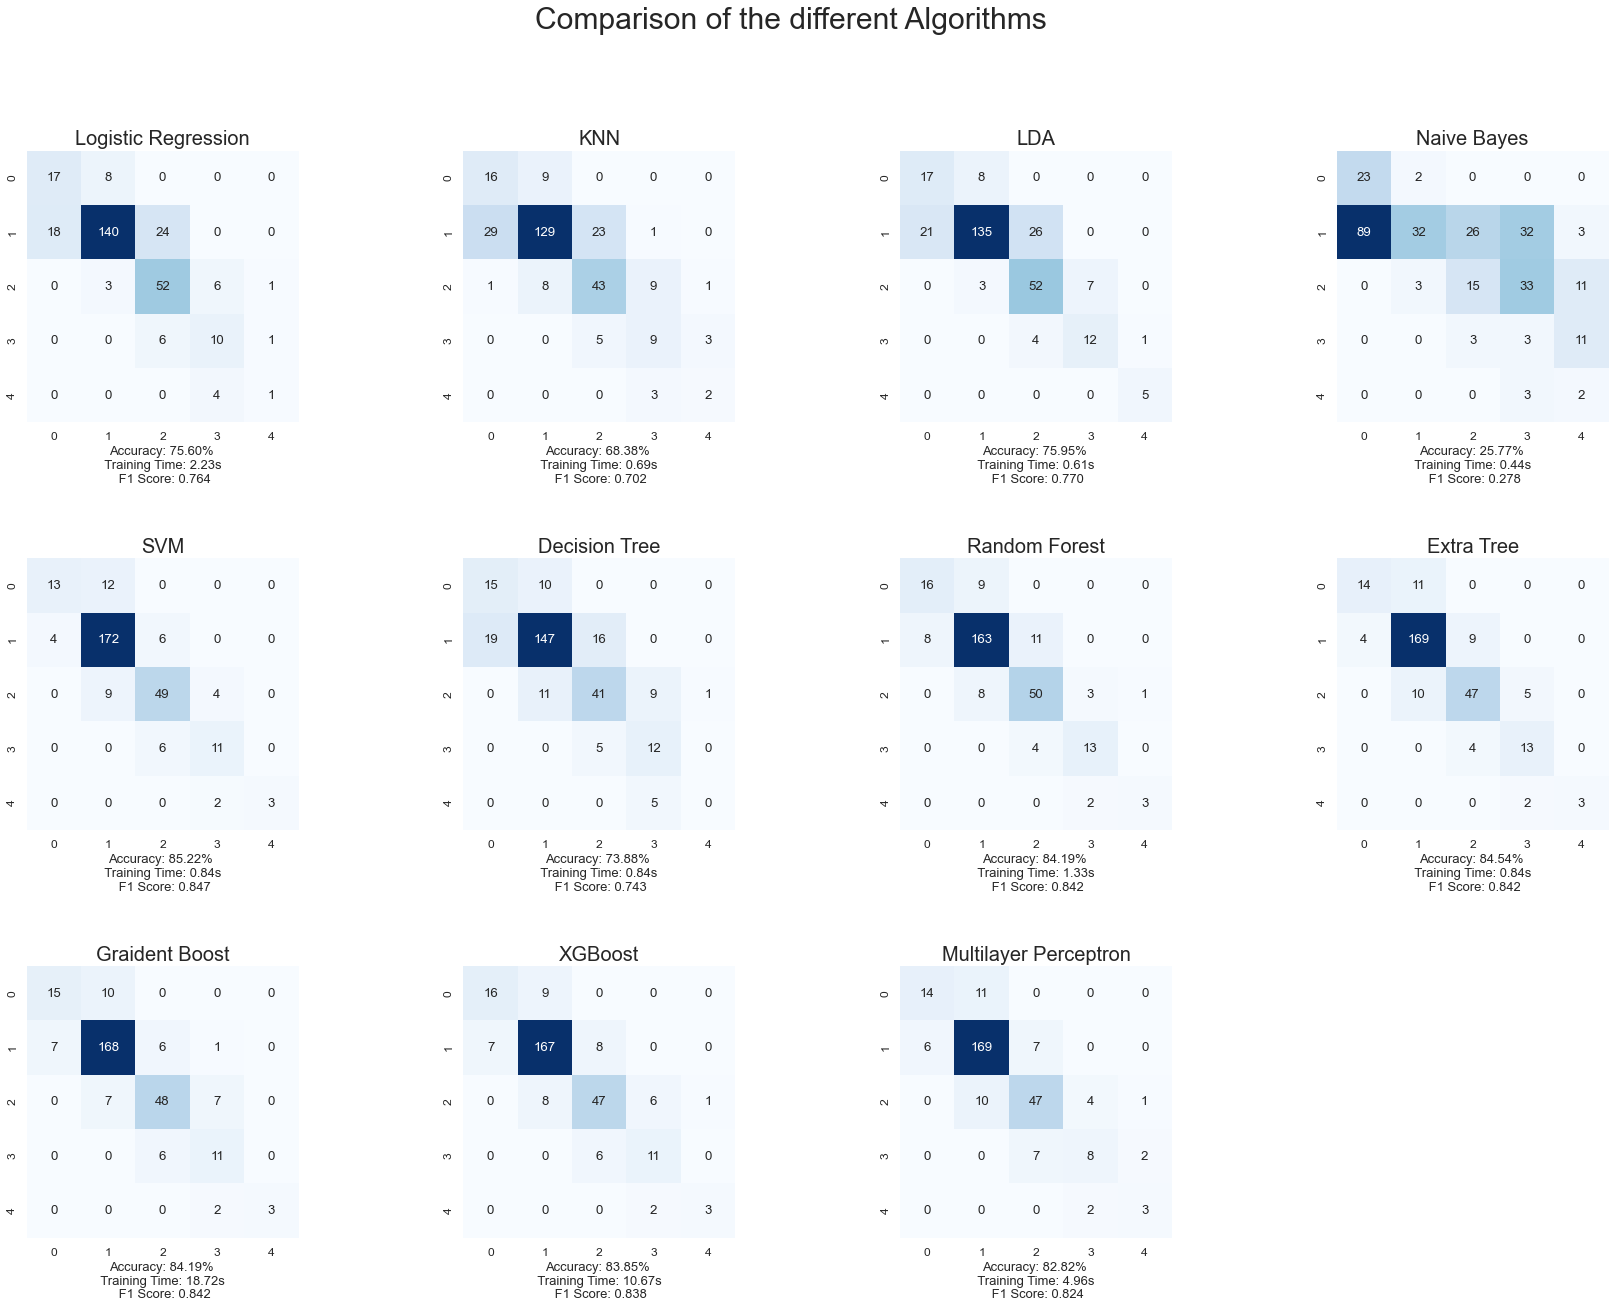

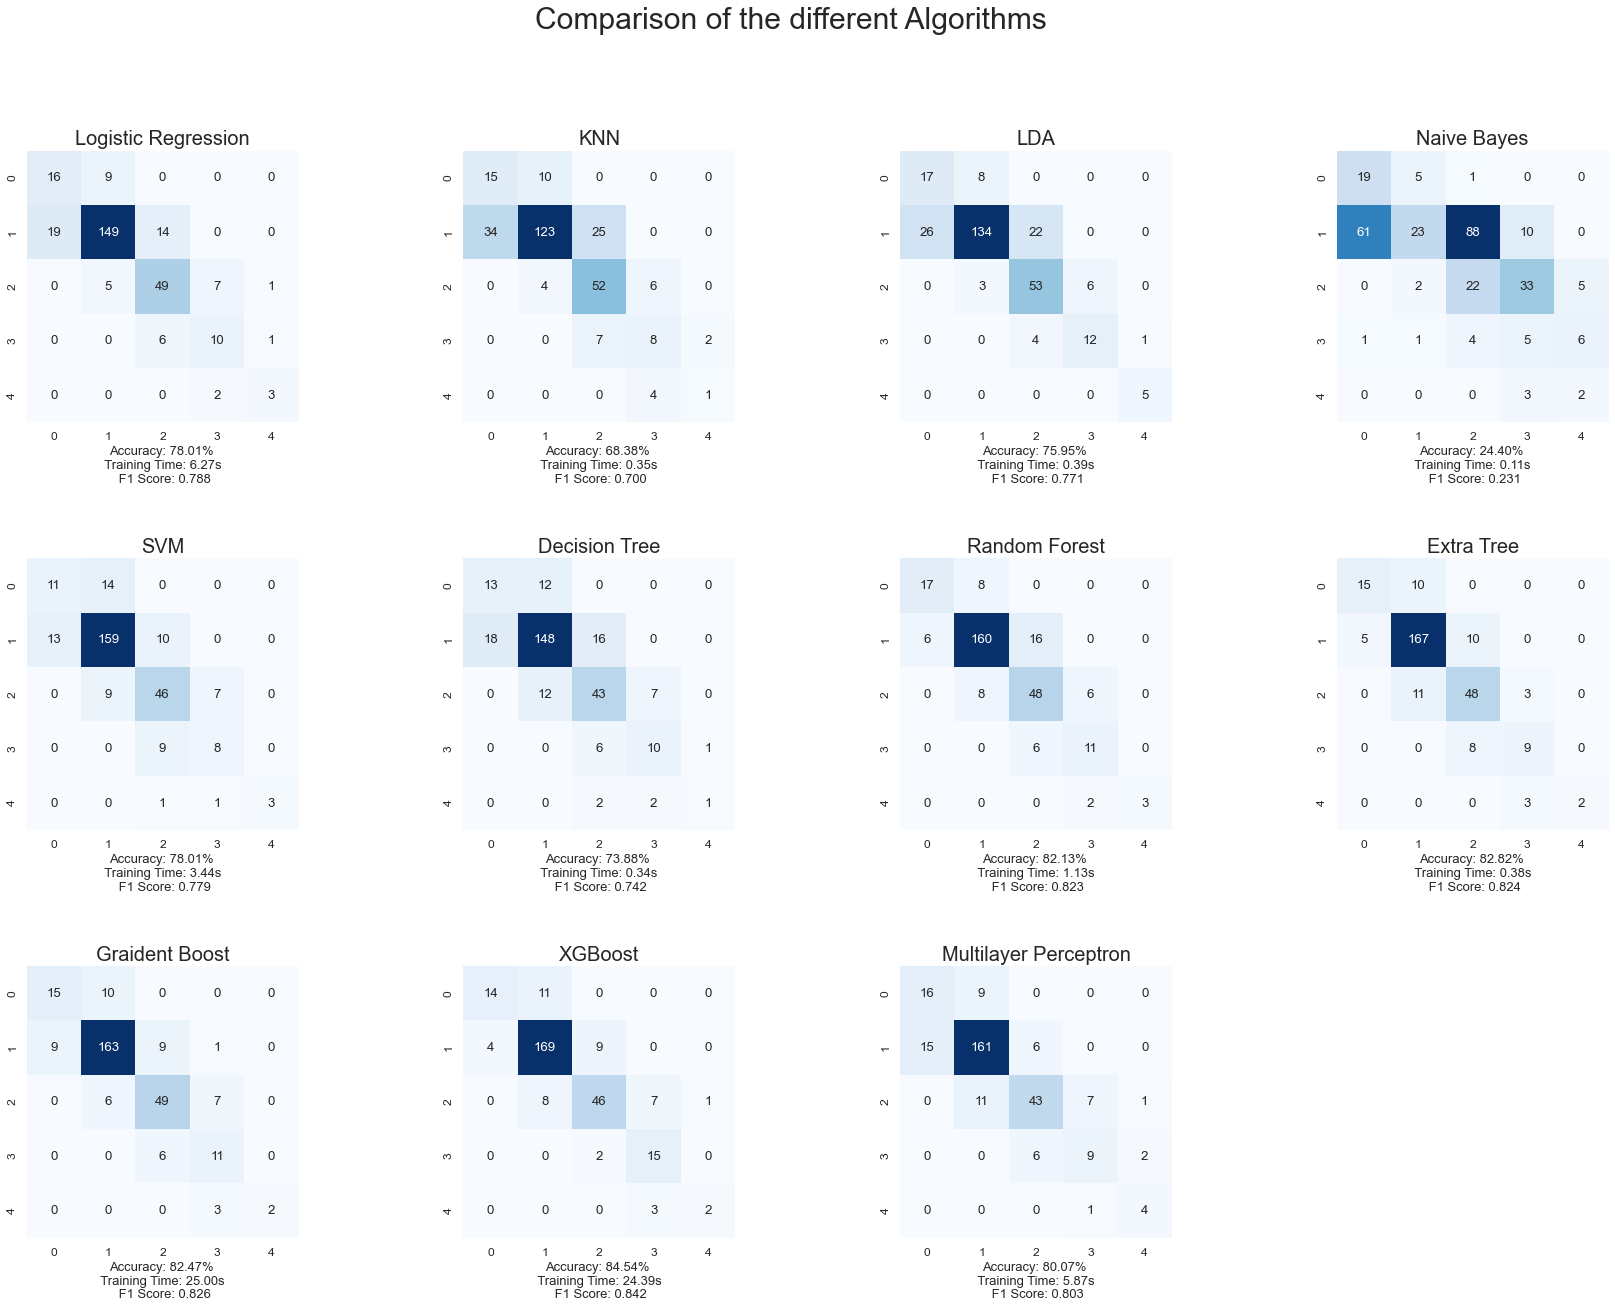

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
SEARCH_S = [LR_search_S, KNN_search_S, LDA_search_S, NB_search_S, SVM_search_S, DT_search_S, RF_search_S, ET_search_S, GB_search_S, XGB_search_S, MLP_search_S]
SEARCH_L = [LR_search_L, KNN_search_L, LDA_search_L, NB_search_L, SVM_search_L, DT_search_L, RF_search_L, ET_search_L, GB_search_L, XGB_search_L, MLP_search_L]
SEARCH = [SEARCH_S, SEARCH_L]
X_TEST = [XS_test, XL_test]
y_TEST = [yS_test, yL_test]
NAME = ["Logistic Regression", "KNN", "LDA", "Naive Bayes","SVM", "Decision Tree", "Random Forest", "Extra Tree", "Graident Boost", "XGBoost", "Multilayer Perceptron"]

for j in range(2):
    fig,ax = plt.subplots(3,4,figsize=(30,20))
    search = SEARCH[j]
    X_test = X_TEST[j]
    y_test = y_TEST[j]
    for i in range(len(search)):
        clf = search[i].best_estimator_
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        training_time = np.mean(search[i].cv_results_["mean_fit_time"]+search[i].cv_results_["mean_score_time"])
        f1 = f1_score(y_test,y_pred,average='weighted')
        sns.heatmap(cm,square=True, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[i//4,i%4])
        ax[i//4,i%4].set_xlabel(f"Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}% \n Training Time: {training_time:.2f}s \n F1 Score: {f1:.3f}", fontsize=13)
        ax[i//4,i%4].set_title(NAME[i],fontsize=20)
        sns.set(font_scale=1.1)
    fig.delaxes(ax[2][3])
    plt.suptitle("Comparison of the different Algorithms", fontsize=30)
    plt.subplots_adjust(hspace=0.5)
    plt.savefig('confusion_matrices.png')